In [2]:
from icecube import icetray, dataio, dataclasses, simclasses, clsim
from icecube.icetray import I3Units, OMKey, I3Frame
from I3Tray import *
from icecube.dataclasses import ModuleKey
import numpy as np
from scipy import stats
from iminuit import minimize

import matplotlib.pyplot as plt

In [3]:
import os, sys
sys.path.append('/home/users/jpyanez/projects/p-one/katil-code/PONE_NuTau/IMINUIT')
from likelihoodHelpers import log_likelihood_biGauss, log_likelihood_doublePeak
from likelihoodHelpers import likelihood_ratio_doublePeak, likelihood_ratio_biGauss, biGauss, double_peak
import scipy, csv
import curveFit
reload(curveFit)

<module 'curveFit' from '/home/users/jpyanez/projects/p-one/katil-code/PONE_NuTau/IMINUIT/curveFit.pyc'>

In [4]:
import likelihoodHelpers
reload(likelihoodHelpers)

<module 'likelihoodHelpers' from '/home/users/jpyanez/projects/p-one/katil-code/PONE_NuTau/IMINUIT/likelihoodHelpers.pyc'>

In [5]:
xtest = np.linspace(-50, 80, 101)

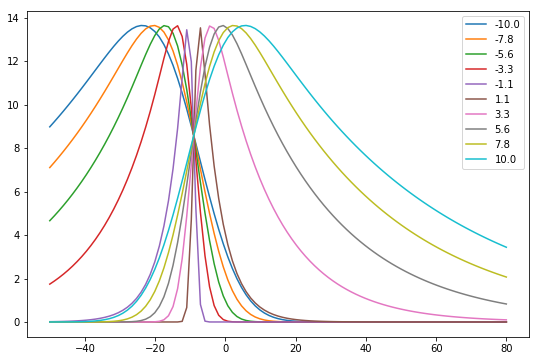

In [6]:
# Testing the width
plt.figure(figsize=(9,6))
amp = 100
pos = -9
k=5
for w in np.linspace(-10, 10, 10):
    plt.plot(xtest,likelihoodHelpers.expGauss(xtest, pos, w, k, amp), label='%0.1f' % w)
plt.legend(loc=0)
#plt.ylim(0,10)

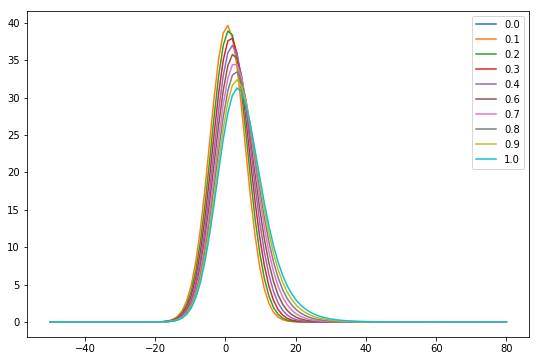

In [7]:
# Testing the k
plt.figure(figsize=(9,6))
amp = 100
pos = 0
w=5
for k in np.linspace(0, 1, 10):
    plt.plot(xtest,likelihoodHelpers.expGauss(xtest, pos, w, k, amp), label='%0.1f' % k)
plt.legend(loc=0)
#plt.ylim(0,10)

In [ ]:
'''
Loading Geometry
'''
reload(curveFit)
gcd_file = '/home/users/akatil/P-ONE/GCD_files/PONE_Phase1.i3.gz'
gcd = dataio.I3File(gcd_file)
cframe = gcd.pop_frame()
geometry = cframe["I3Geometry"]
omgeo = geometry.omgeo
print('loaded geometry')

infile = '/data/p-one/akatil/step_5_medium_water/NuTau_NuE_20Events/step_5_587_medium_water_custom_mDOM_recoPulse.i3.gz'

tray = I3Tray()

tray.AddModule('I3Reader', 'reader',
            FilenameList = [gcd_file, infile]
            )

tray.AddModule(curveFit.curveFit, "Double Peak Selector",
               omgeo = omgeo,
               InputMCPETree = "I3RecoPulses",
               OutputMCPETree = "Parameters",
               FrameList = [2],
               StringList = [5],
               DOMList = [15])

tray.AddModule("TrashCan","adios")
tray.Execute()
tray.Finish()

loaded geometry
('Frame number - 2', 'String number - 5', 'DOM number - 15')
Bounds on single peak
╒═══════════╤══════════╕
│  -63.6356 │  68.3644 │
├───────────┼──────────┤
│ -132      │ 132      │
├───────────┼──────────┤
│    0.1    │  20      │
├───────────┼──────────┤
│    0.1    │   1e+10  │
╘═══════════╧══════════╛
---  ----  ----  --  ----
llh  pos1  wid1  k1  amp1
---  ----  ----  --  ----
61114.56721	-0.00000	66.00000	2.00000	9536.84013
61049.75956	0.12072	66.00000	2.00000	9536.84013
61179.30726	-0.12071	66.00000	2.00000	9536.84013
61072.02754	0.07925	66.00000	2.00000	9536.84013
61157.07775	-0.07925	66.00000	2.00000	9536.84013
61125.75456	-0.00000	66.12068	2.00000	9536.84013
61103.31101	-0.00000	65.87925	2.00000	9536.84013
61121.85299	-0.00000	66.07852	2.00000	9536.84013
61107.25229	-0.00000	65.92145	2.00000	9536.84013
58373.13354	-0.00000	66.00000	2.12705	9536.84013
63984.90736	-0.00000	66.00000	1.87664	9536.84013
60834.64841	-0.00000	66.00000	2.01254	9536.84013
61395.77611	

-3862.89459	23.08558	131.76203	15.23510	1351.36546
-3862.99095	23.08558	131.78400	15.24567	1351.36546
-3862.84879	23.08558	131.78400	15.22452	1351.36546
-3863.02547	23.08558	131.78400	15.25088	1351.36546
-3862.81325	23.08558	131.78400	15.21930	1351.36546
-3862.68951	23.08558	131.78400	15.23510	1354.11892
-3863.14436	23.08558	131.78400	15.23510	1348.61481
-3865.55344	21.06795	131.82474	15.14478	1317.18147
-3875.25575	12.82650	131.94518	14.77790	1184.82496
-3887.76970	-8.22566	131.94839	13.82499	884.58995
-3886.14679	-13.32174	131.88395	13.58363	817.43604
-3887.74740	-6.30072	131.96588	13.91463	910.39190
-3888.00511	-8.39762	131.94839	13.82499	884.58995
-3887.53275	-8.05362	131.94839	13.82499	884.58995
-3887.76002	-8.22566	131.93487	13.82499	884.58995
-3887.77826	-8.22566	131.96035	13.82499	884.58995
-3887.62127	-8.22566	131.94839	13.84216	884.58995
-3887.91647	-8.22566	131.94839	13.80781	884.58995
-3888.07191	-8.22566	131.94839	13.82499	886.81811
-3887.45800	-8.22566	131.94839	13.82499	

-3968.89264	-63.59811	114.59185	0.45661	87.83314
-3968.89432	-63.61627	114.59185	0.45661	87.83314
-3968.89039	-63.57400	114.59185	0.45661	87.83314
-3968.89530	-63.62685	114.59185	0.45661	87.83314
-3968.88808	-63.54939	114.59185	0.45661	87.83314
-3968.87836	-63.59811	115.28206	0.45661	87.83314
-3968.90247	-63.59811	113.88868	0.45661	87.83314
-3968.88379	-63.59811	115.04361	0.45661	87.83314
-3968.89959	-63.59811	114.13457	0.45661	87.83314
-3968.73986	-63.59811	114.59185	0.45913	87.83314
-3969.04355	-63.59811	114.59185	0.45409	87.83314
-3970.35316	-63.59811	114.59185	0.45661	88.53603
-3967.33871	-63.59811	114.59185	0.45661	87.13305
-3970.97238	-63.45751	112.80500	0.44552	88.51566
-3977.82441	-61.85929	104.86974	0.40288	91.27220
-3984.85182	-51.45421	80.95099	0.31120	98.11622
-3984.46712	-52.11196	80.95099	0.31120	98.11622
-3985.21434	-50.78009	80.95099	0.31120	98.11622
-3984.74144	-51.64842	80.95099	0.31120	98.11622
-3984.96031	-51.25859	80.95099	0.31120	98.11622
-3985.27608	-51.45421	81.

-3989.57272	-28.46772	78.70156	0.10000	100.50821
-3989.61541	-28.46772	78.70156	0.10000	101.26006
-3989.61437	-28.63596	78.70156	0.10000	101.26006
-3989.61454	-28.29923	78.70156	0.10000	101.26006
-3989.61445	-28.46772	78.88987	0.10000	101.26006
-3989.61447	-28.46772	78.51300	0.10000	101.26006
-3989.61454	-28.46772	78.70156	0.10187	101.26006
-3989.61466	-28.46772	78.70156	0.10172	101.26006
-3989.57182	-28.46772	78.70156	0.10000	102.01471
-3989.57272	-28.46772	78.70156	0.10000	100.50821
-3989.61535	-28.50139	78.70156	0.10000	101.26006
-3989.61539	-28.43404	78.70156	0.10000	101.26006
-3989.61537	-28.46772	78.73924	0.10000	101.26006
-3989.61537	-28.46772	78.66387	0.10000	101.26006
-3989.61540	-28.46772	78.70910	0.10000	101.26006
-3989.61541	-28.46772	78.69403	0.10000	101.26006
-3989.61540	-28.46772	78.70156	0.10009	101.26006
-3989.61540	-28.46772	78.70156	0.10006	101.26006
-3989.61541	-28.46772	78.70156	0.10001	101.26006
-3989.61541	-28.46772	78.70156	0.10000	101.26006
-3989.61488	-28.4677

9942.19415	-61.55027	-13.56700	2.00000	9536.84013	31.22111	1.35572	7.50410	9536.84013
9919.77547	-61.55027	-13.56700	2.00000	9536.84013	31.17360	1.35572	7.50410	9536.84013
9934.85990	-61.55027	-13.56700	2.00000	9536.84013	31.20553	1.35572	7.50410	9536.84013
9927.14499	-61.55027	-13.56700	2.00000	9536.84013	31.18918	1.35572	7.50410	9536.84013
9933.88154	-61.55027	-13.56700	2.00000	9536.84013	31.19736	1.36276	7.50410	9536.84013
9928.08425	-61.55027	-13.56700	2.00000	9536.84013	31.19736	1.34867	7.50410	9536.84013
9930.61400	-61.55027	-13.56700	2.00000	9536.84013	31.19736	1.35572	7.51341	9536.84013
9931.39517	-61.55027	-13.56700	2.00000	9536.84013	31.19736	1.35572	7.49480	9536.84013
9929.74105	-61.55027	-13.56700	2.00000	9536.84013	31.19736	1.35572	7.53416	9536.84013
9932.26383	-61.55027	-13.56700	2.00000	9536.84013	31.19736	1.35572	7.47407	9536.84013
9934.50565	-61.55027	-13.56700	2.00000	9536.84013	31.19736	1.35572	7.50410	9545.93475
9927.50612	-61.55027	-13.56700	2.00000	9536.84013	31.1

-4009.21609	-63.33730	-58.01513	6.56471	955.62882	4.33198	4.36232	18.58850	845.61064
-4010.14692	-63.32463	-59.90555	6.68607	976.25764	4.81330	4.52720	18.54915	829.56981
-4010.29193	-63.31864	-60.78061	6.74278	985.93844	5.04052	4.60397	18.53065	822.15296
-4010.35170	-63.34249	-60.78061	6.74278	985.93844	5.04052	4.60397	18.53065	822.15296
-4010.22965	-63.29386	-60.78061	6.74278	985.93844	5.04052	4.60397	18.53065	822.15296
-4010.38584	-63.31864	-60.72050	6.74278	985.93844	5.04052	4.60397	18.53065	822.15296
-4010.19746	-63.31864	-60.84070	6.74278	985.93844	5.04052	4.60397	18.53065	822.15296
-4010.46499	-63.31864	-60.66955	6.74278	985.93844	5.04052	4.60397	18.53065	822.15296
-4010.11695	-63.31864	-60.89161	6.74278	985.93844	5.04052	4.60397	18.53065	822.15296
-4010.51182	-63.31864	-60.78061	6.75377	985.93844	5.04052	4.60397	18.53065	822.15296
-4010.06965	-63.31864	-60.78061	6.73179	985.93844	5.04052	4.60397	18.53065	822.15296
-4009.93018	-63.31864	-60.78061	6.74278	988.29066	5.04052	4.60397

-4068.21568	-62.91051	-62.74476	6.42736	812.89612	11.83899	3.94767	9.81345	591.86339
-4068.19819	-62.91051	-62.74476	6.42736	812.89612	11.83899	3.95759	9.78310	591.86339
-4068.20471	-62.91051	-62.74476	6.42736	812.89612	11.83899	3.95759	9.84380	591.86339
-4068.16382	-62.91051	-62.74476	6.42736	812.89612	11.83899	3.95759	9.81345	593.68630
-4068.23598	-62.91051	-62.74476	6.42736	812.89612	11.83899	3.95759	9.81345	590.04329
-4068.50011	-62.90774	-62.53869	6.40942	806.61453	11.85079	3.93294	9.66555	580.31805
-4068.54378	-62.90614	-62.41936	6.39904	802.99112	11.85762	3.91868	9.58001	573.68983
-4068.53287	-62.97748	-62.41936	6.39904	802.99112	11.85762	3.91868	9.58001	573.68983
-4068.55374	-62.83117	-62.41936	6.39904	802.99112	11.85762	3.91868	9.58001	573.68983
-4068.52510	-62.90614	-62.31125	6.39904	802.99112	11.85762	3.91868	9.58001	573.68983
-4068.56044	-62.90614	-62.52742	6.39904	802.99112	11.85762	3.91868	9.58001	573.68983
-4068.55251	-62.90614	-62.41936	6.40956	802.99112	11.85762	3.9186

-4090.29703	-62.91618	-71.16212	7.19185	839.16703	19.44919	6.85266	2.62451	252.51087
-4090.29629	-62.91618	-71.16212	7.19185	834.83495	19.44919	6.85266	2.62451	252.51087
-4090.29600	-62.91618	-71.16212	7.19185	836.99958	19.48230	6.85266	2.62451	252.51087
-4090.30127	-62.91618	-71.16212	7.19185	836.99958	19.41609	6.85266	2.62451	252.51087
-4090.29920	-62.91618	-71.16212	7.19185	836.99958	19.44919	6.86607	2.62451	252.51087
-4090.29817	-62.91618	-71.16212	7.19185	836.99958	19.44919	6.83926	2.62451	252.51087
-4090.29996	-62.91618	-71.16212	7.19185	836.99958	19.44919	6.85266	2.61442	252.51087
-4090.29708	-62.91618	-71.16212	7.19185	836.99958	19.44919	6.85266	2.63461	252.51087
-4090.29648	-62.91618	-71.16212	7.19185	836.99958	19.44919	6.85266	2.62451	253.70202
-4090.29373	-62.91618	-71.16212	7.19185	836.99958	19.44919	6.85266	2.62451	251.32252
-4090.30368	-62.91369	-71.53510	7.22132	837.88021	19.43332	6.89316	2.59251	250.20243
-4090.30394	-62.91419	-71.46001	7.21538	837.70273	19.43652	6.8850

/home/users/jpyanez/projects/p-one/katil-code/PONE_NuTau/IMINUIT/likelihoodHelpers.py:103: RuntimeWarning: divide by zero encountered in log
  L = model - (n*np.log(model))
/home/users/jpyanez/projects/p-one/katil-code/PONE_NuTau/IMINUIT/likelihoodHelpers.py:103: RuntimeWarning: invalid value encountered in multiply
  L = model - (n*np.log(model))
/home/users/jpyanez/.local/lib/python2.7/site-packages/iminuit/_minimize.py:96: RuntimeWarning: result is Nan
fcn is called with following arguments:
    x0 = -49.831680
    x1 = +0.029487
    x2 = +1.856959
    x3 = +9536.840133
    x4 = +20.617124
    x5 = +0.002059
    x6 = +2.000000
    x7 = +9536.840133

  m.migrad(ncall=maxfev)
